Background subtraction

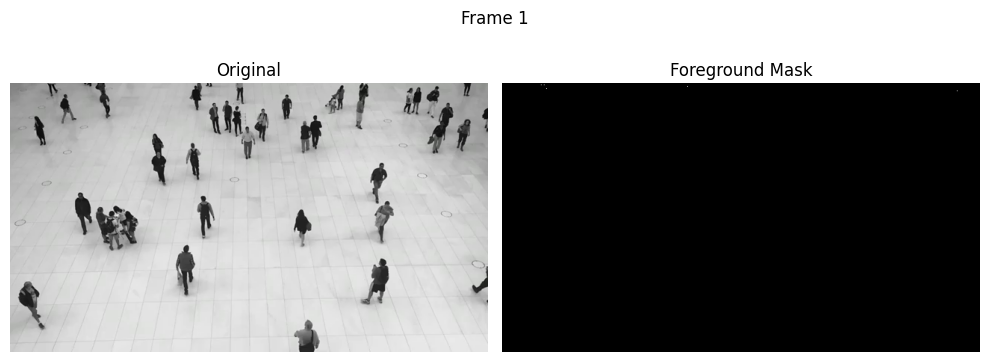

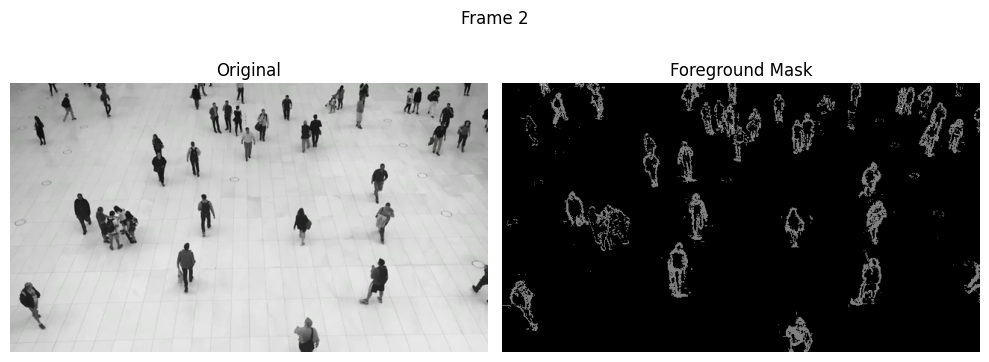

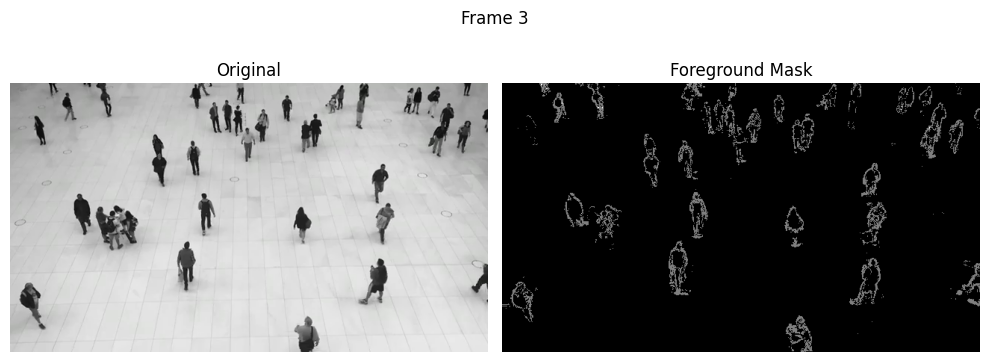

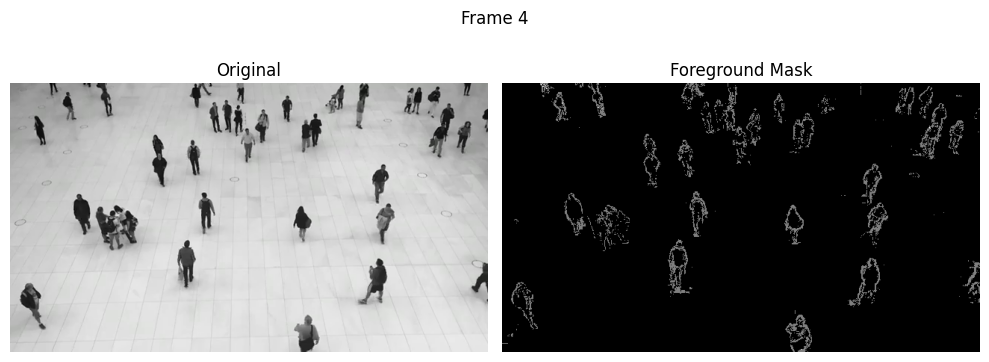

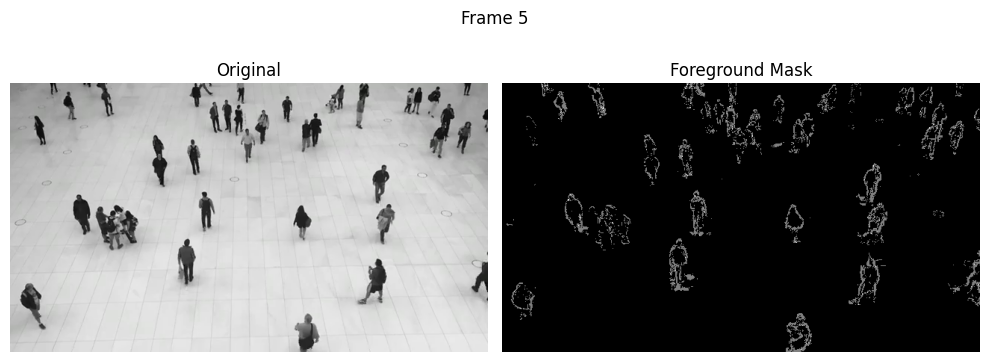

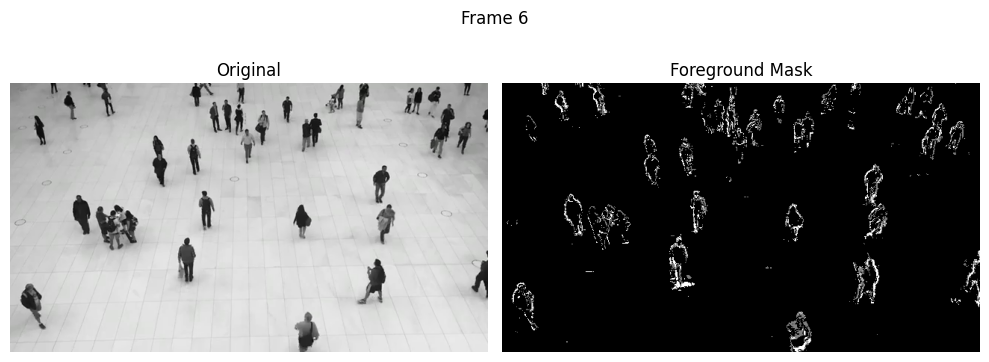

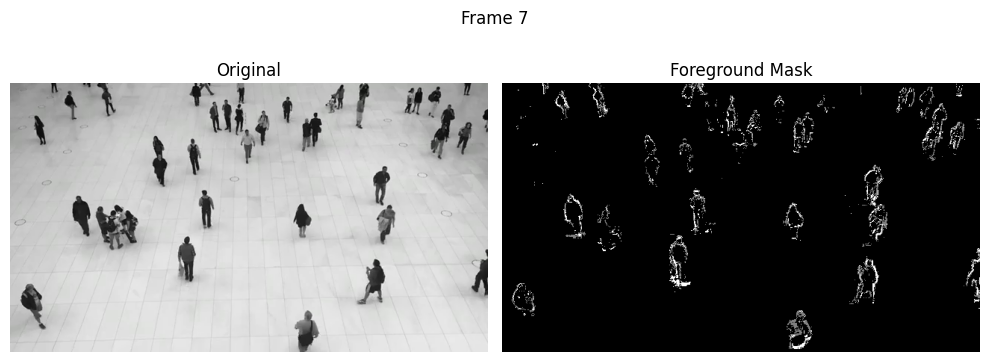

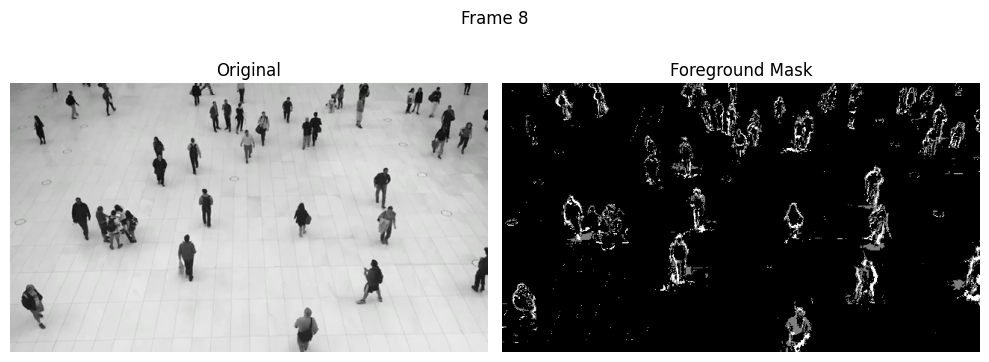

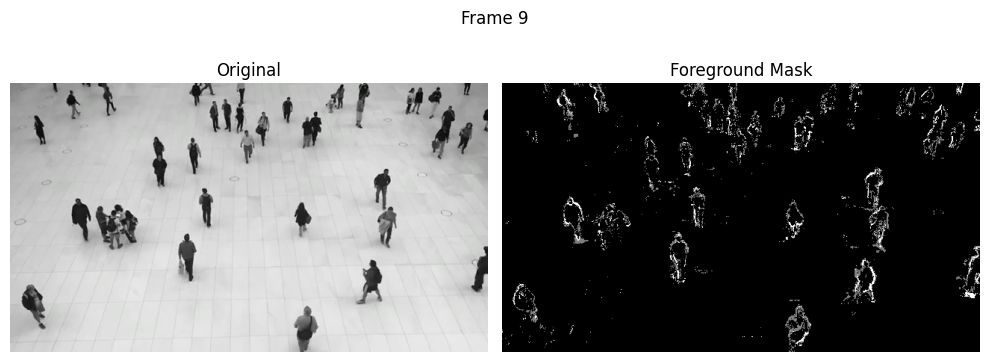

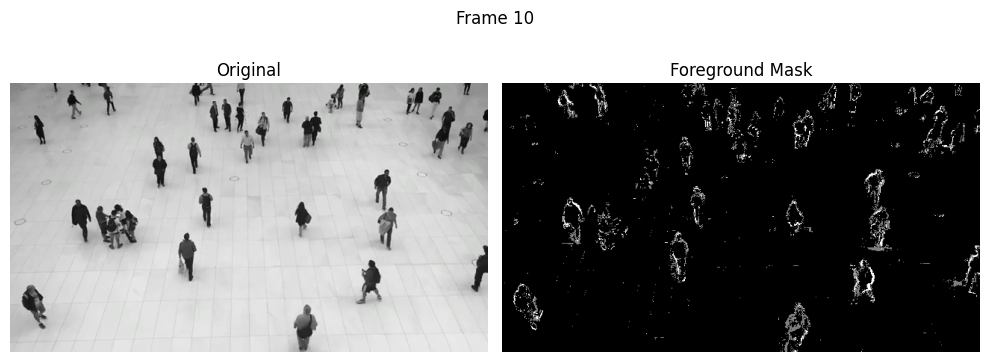

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the video file
video_path = "video.mp4"  # Change this to your video file path
cap = cv2.VideoCapture(video_path)

# Create background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

frame_count = 0
max_frames = 10  # Display only the first 10 frames for demonstration

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Convert BGR frame to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(fgmask, cmap='gray')
    plt.title('Foreground Mask')
    plt.axis('off')

    plt.suptitle(f'Frame {frame_count + 1}')
    plt.tight_layout()
    plt.show()

    frame_count += 1

cap.release()


Averaging'

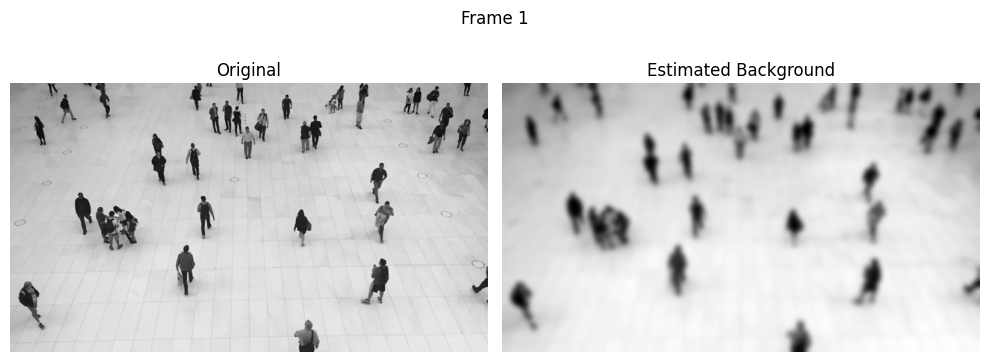

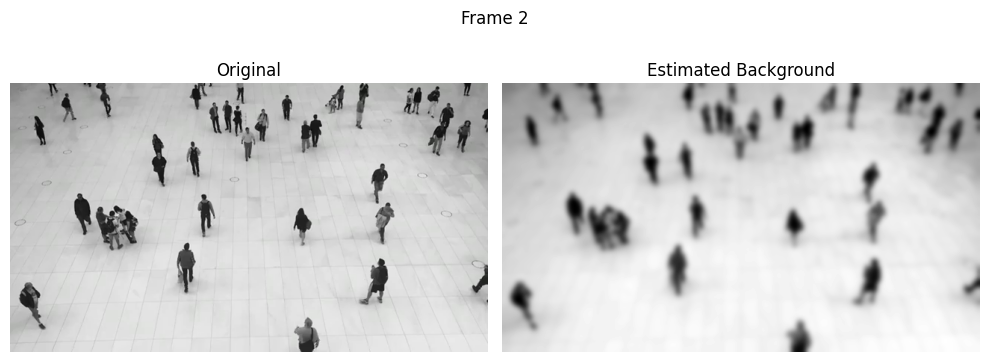

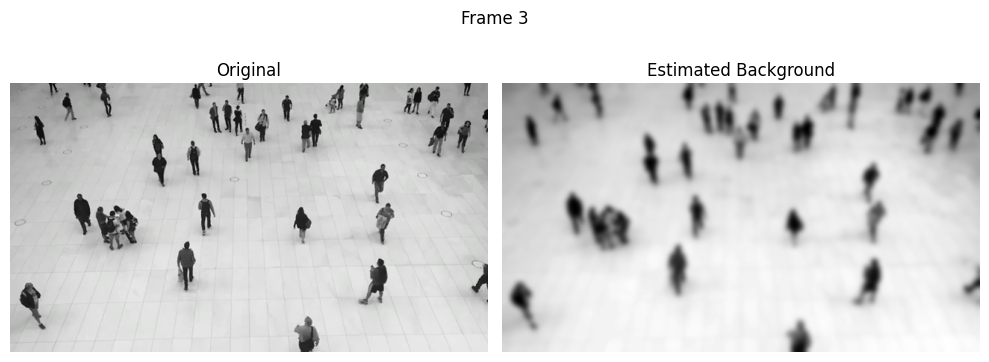

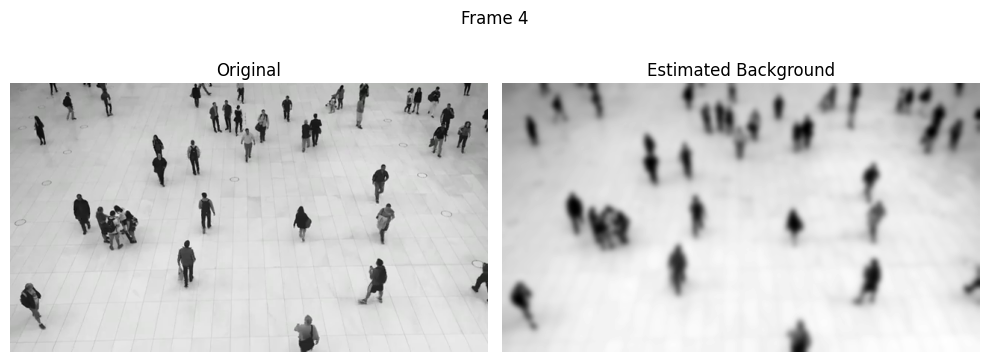

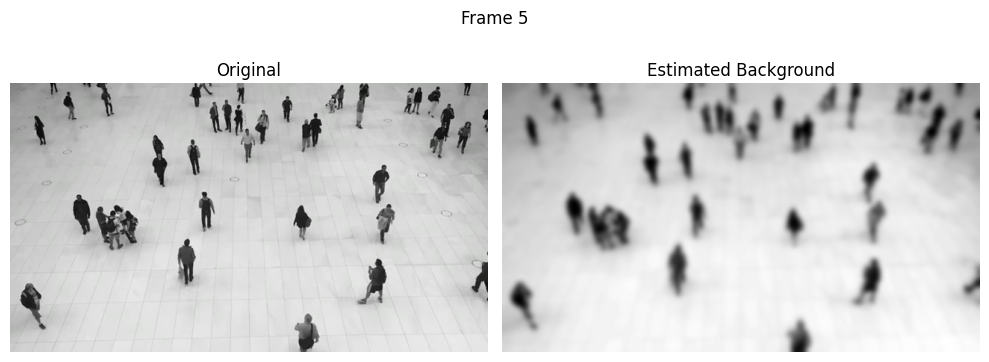

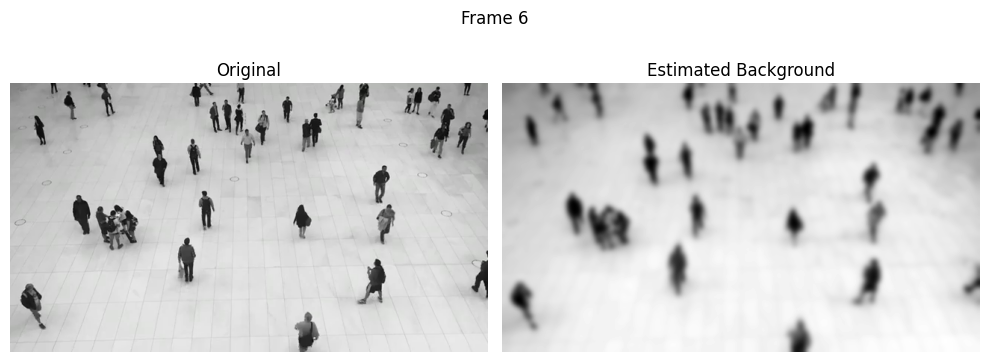

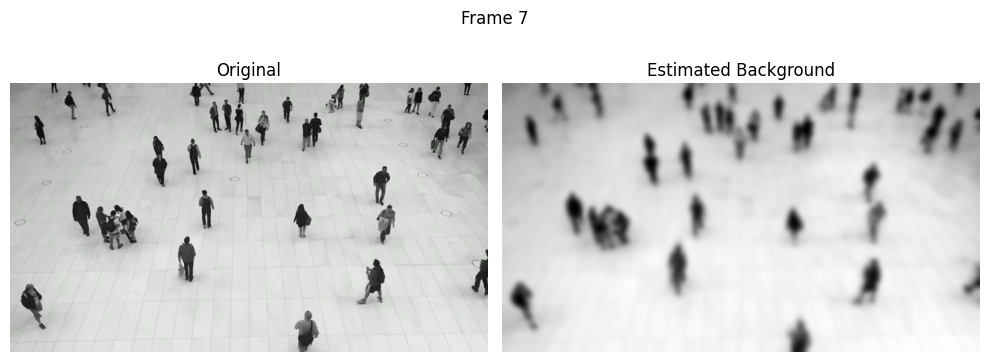

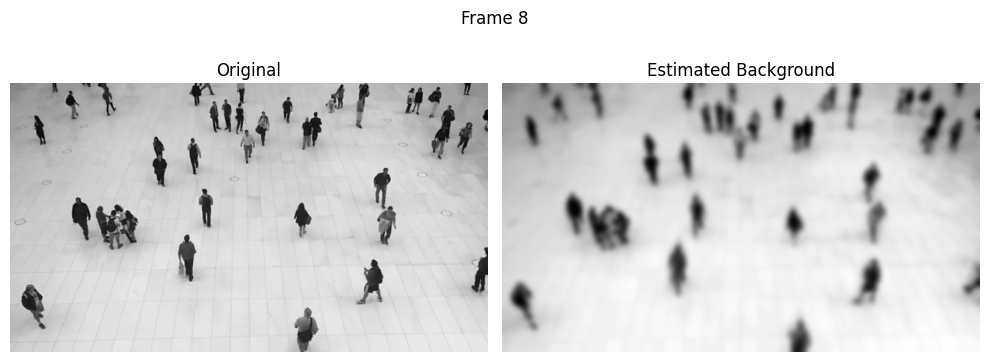

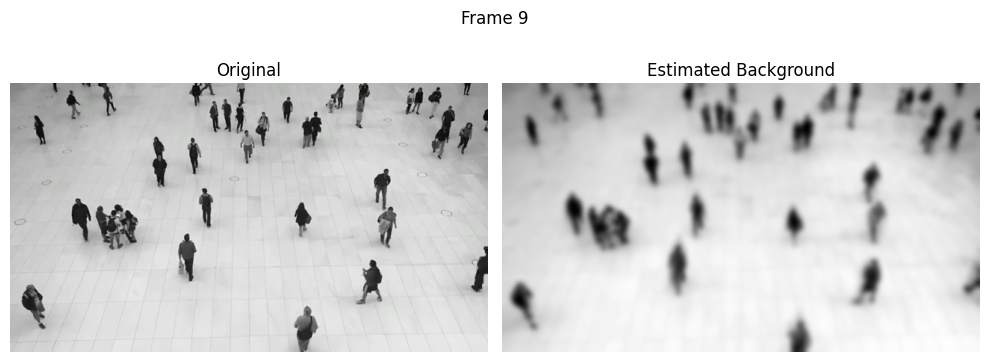

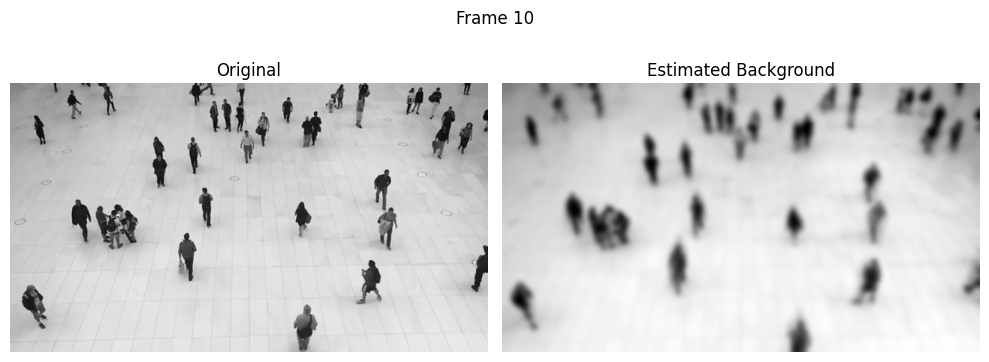

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video file
video_path = "video.mp4"  # Change this to your video file path
cap = cv2.VideoCapture(video_path)

avg = None
alpha = 0.05  # Weight for averaging

frame_count = 0
max_frames = 10  # Limit for demonstration

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    if avg is None:
        avg = np.float32(gray)

    # Update the background model
    cv2.accumulateWeighted(gray, avg, alpha)
    background = cv2.convertScaleAbs(avg)

    # Convert original frame to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display with matplotlib
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(background, cmap='gray')
    plt.title("Estimated Background")
    plt.axis('off')

    plt.suptitle(f"Frame {frame_count + 1}")
    plt.tight_layout()
    plt.show()

    frame_count += 1

cap.release()


scene change detection

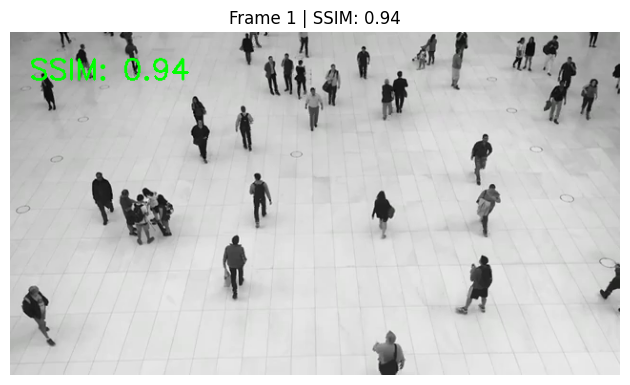

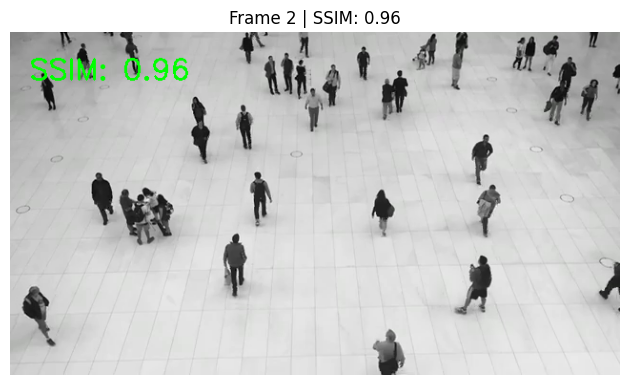

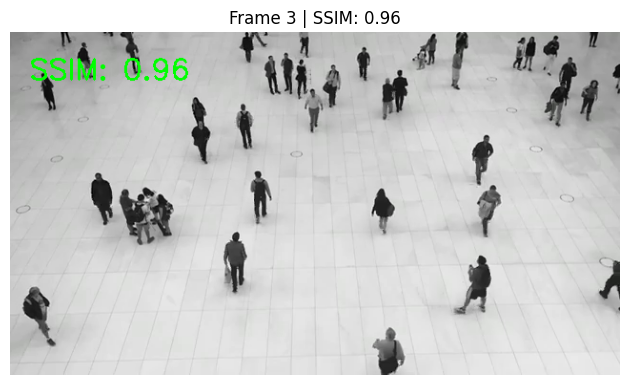

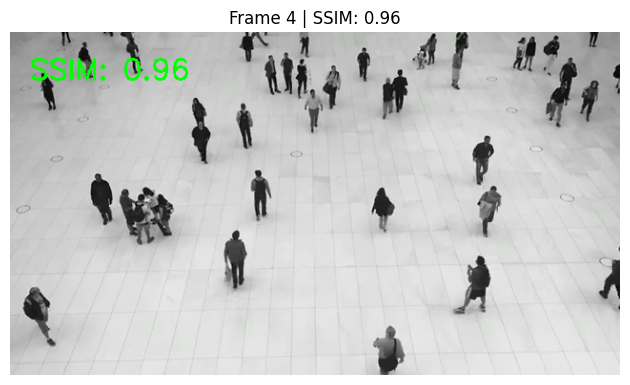

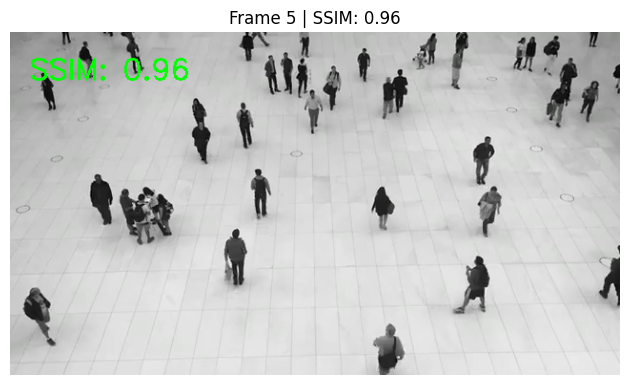

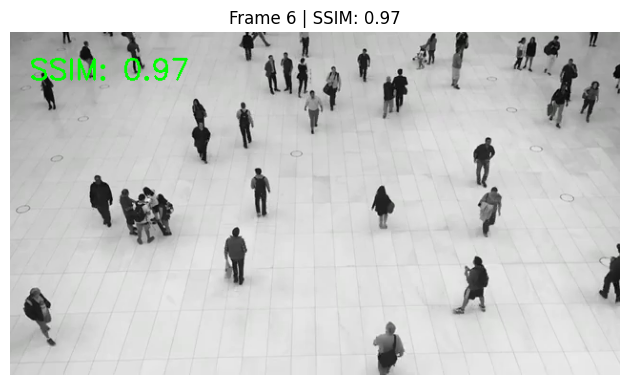

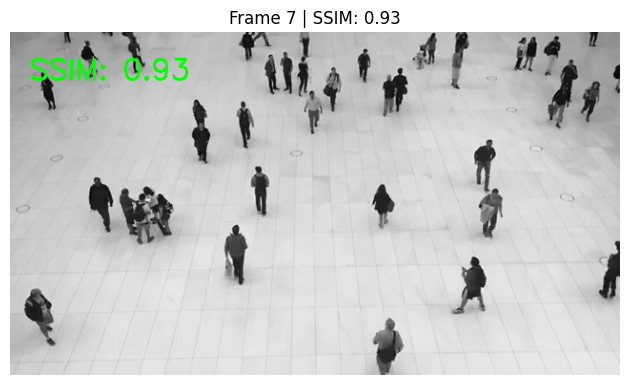

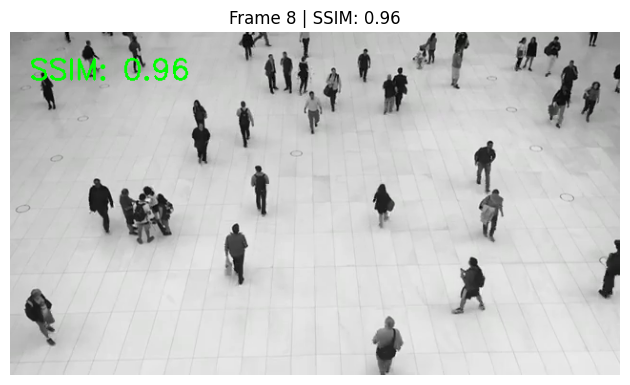

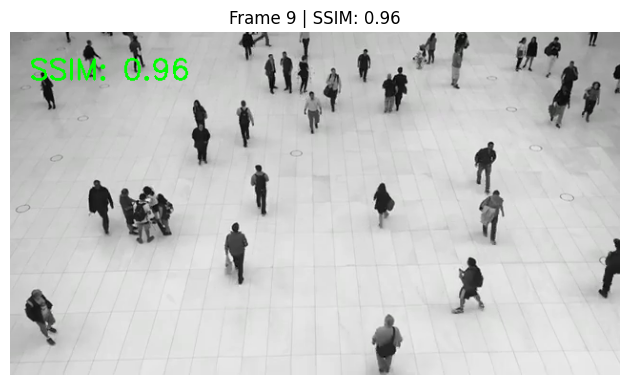

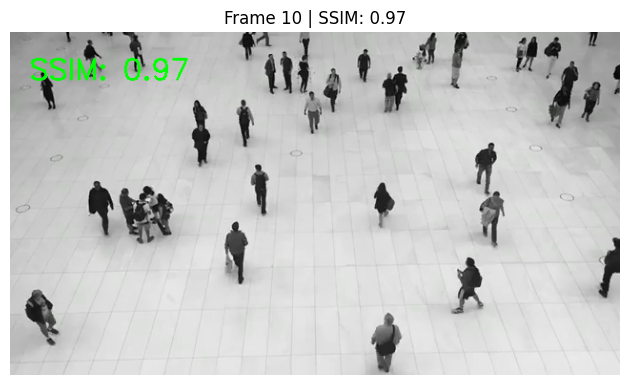

In [3]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load the video file
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

ret, prev_frame = cap.read()
if not ret:
    print("Error: Could not read the video file.")
    cap.release()
    exit()

frame_count = 0
max_frames = 10  # Show only the first 10 frames for demo

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frames to grayscale
    gray_prev = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    gray_curr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute SSIM
    similarity = ssim(gray_prev, gray_curr)

    # Overlay SSIM score on frame
    cv2.putText(frame, f'SSIM: {similarity:.2f}', (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convert frame to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display frame using matplotlib
    plt.imshow(frame_rgb)
    plt.title(f"Frame {frame_count + 1} | SSIM: {similarity:.2f}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    prev_frame = frame.copy()
    frame_count += 1

cap.release()
